In [ ]:
import numpy as np
import pandas as pd

# importing matplot and seaborn visualization libraaries 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from scipy import stats
# testing and training the data
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
# importing logistic regression algorithm
from sklearn.linear_model import LogisticRegression
#importing random forest classifier algorithms
from sklearn.ensemble import RandomForestClassifier
# importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
#importing KNN classifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv/heart.csv")


In [ ]:
df = pd.DataFrame(data1)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Check duplicate rows in data
duplicate_rows = data1[data1.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (1, 14)


In [ ]:
#removing duplicate rows
data = data1.drop_duplicates()
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)


Number of duplicate rows ::  (0, 14)


In [ ]:
#checking for null values
print("Null values :: ")
print(data.isnull() .sum())

Null values :: 
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [ ]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


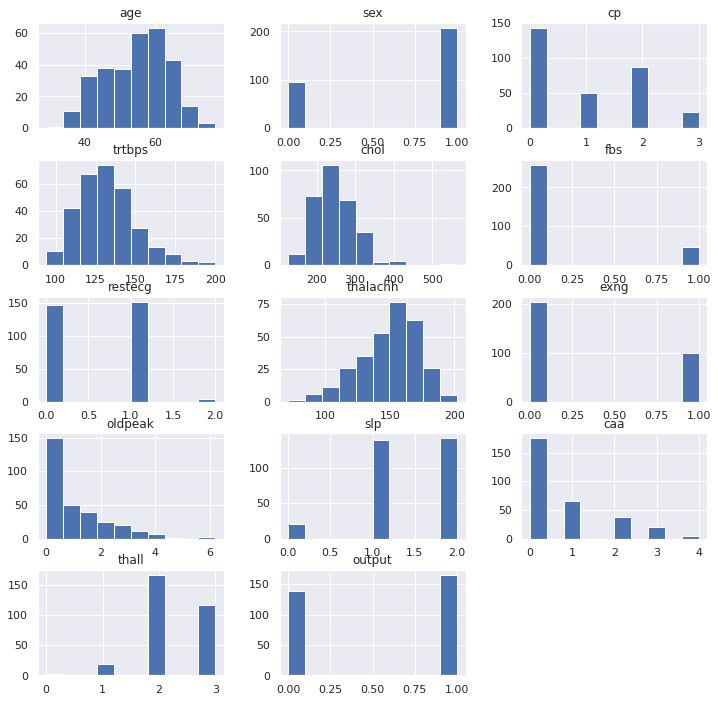

In [ ]:
#plotting histogram
df.hist(figsize=(12,12),layout=(5,3));

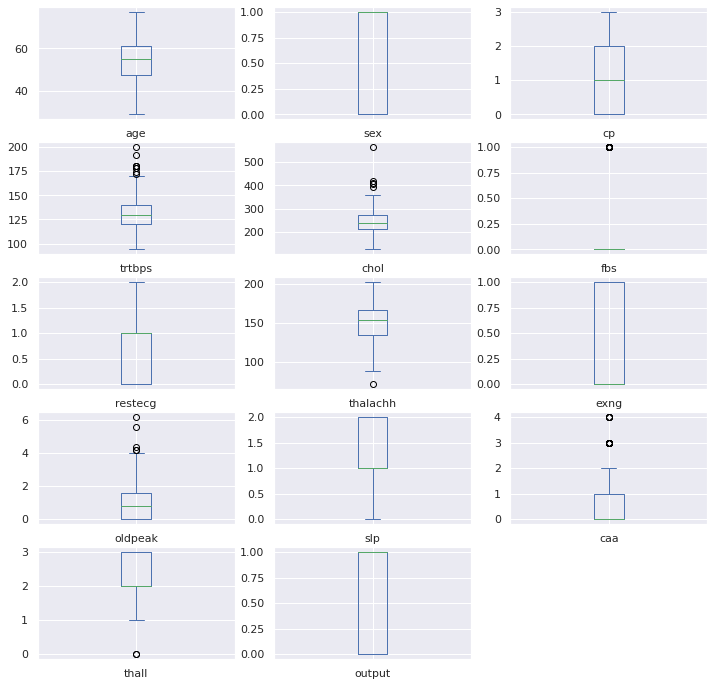

In [ ]:
df.plot(kind = 'box',subplots = True , figsize=(12,12),layout=(5,3));
plt.show()

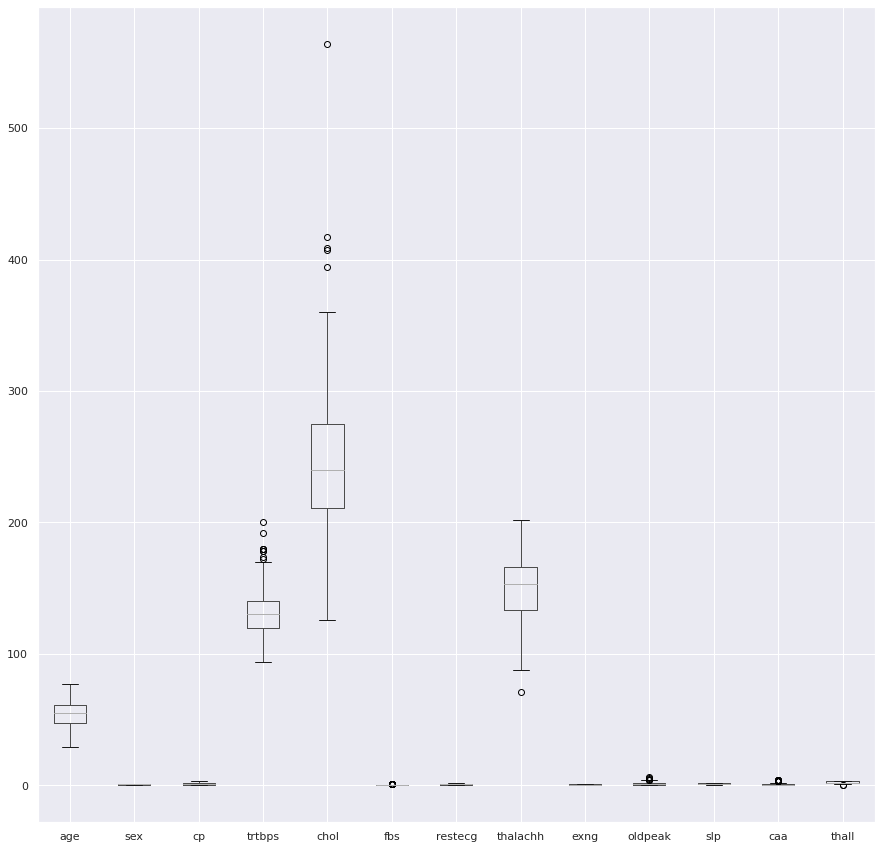

In [ ]:
boxplot = df.boxplot(column=['age','sex',	'cp','trtbps',	'chol','fbs','restecg',	'thalachh',	'exng',	'oldpeak',	'slp',	'caa',	'thall'], figsize =(15,15))  

In [ ]:
#we found outliers
# removing outliers using 2methods
# IQR and z score
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
print('InterQuartile Range')
print(IQR)
# Remove the outliers using IQR
data2 = data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
data2

InterQuartile Range
age         13.00
sex          1.00
cp           2.00
trtbps      20.00
chol        63.75
fbs          0.00
restecg      1.00
thalachh    32.75
exng         1.00
oldpeak      1.60
slp          1.00
caa          1.00
thall        1.00
output       1.00
dtype: float64


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#Removing outliers using Z-score
z = np.abs(stats.zscore(data))
data3 = data[(z<3).all(axis=1)]
data3.shape

(287, 14)

cleaned data as data3

In [ ]:
#after using z score we have left with more data points so we are going to consider z score
#finding correlation 
#using two methods 
#1.pearson correlation
#2.spearman correlation


Text(0.5, 1.0, 'Pearson Correlation')

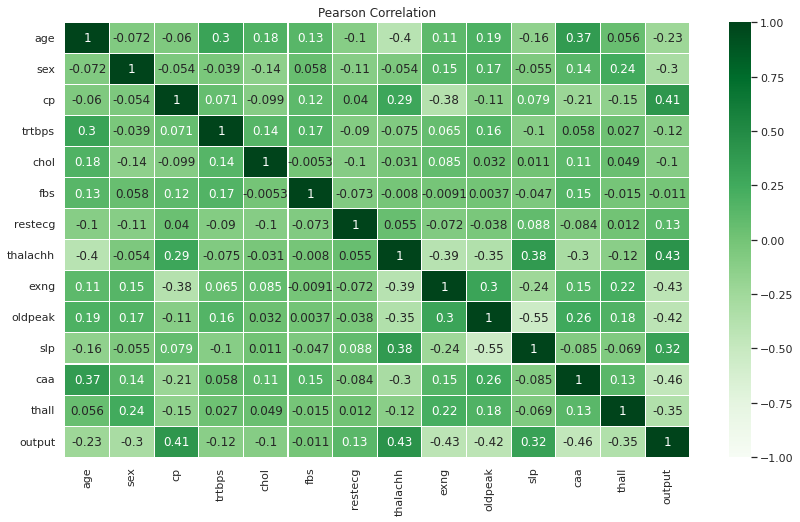

In [ ]:
pearsonCorr = data3.corr(method='pearson')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Spearman Correlation')

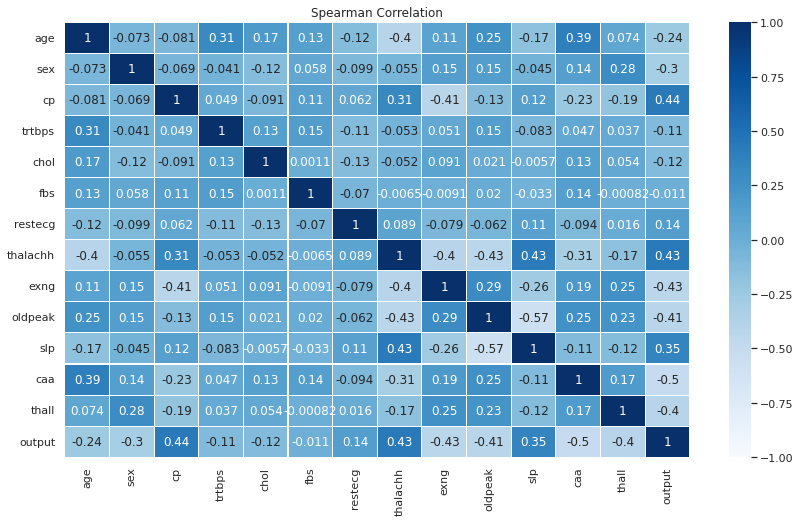

In [ ]:
spearmanCorr = data3.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(spearmanCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

In [ ]:
#From this we observe that the minimum correlation between output and other features in fbs,trtbps , restecg and chol
#dropping least correlation values
data4 = data3.drop(["chol","trtbps",	"fbs",	"restecg"], axis = 1)
data4.shape


(287, 10)

In [ ]:
x = data4.iloc[:,0:10]
y = data4.iloc[:, -1]

In [ ]:
x

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,123,1,0.2,1,0,3,0
299,45,1,3,132,0,1.2,1,0,3,0
300,68,1,0,141,0,3.4,1,2,3,0
301,57,1,0,115,1,1.2,1,1,3,0


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 287, dtype: int64

**Normalizing data by using min-max scaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
X = pd.DataFrame(scaler.transform(x))
X.columns = features

In [ ]:
X

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1.0,1.000000,0.543860,0.0,0.522727,0.0,0.000000,0.0,1.0
1,0.166667,1.0,0.666667,0.868421,0.0,0.795455,0.0,0.000000,0.5,1.0
2,0.250000,0.0,0.333333,0.736842,0.0,0.318182,1.0,0.000000,0.5,1.0
3,0.562500,1.0,0.333333,0.789474,0.0,0.181818,1.0,0.000000,0.5,1.0
4,0.583333,0.0,0.000000,0.657895,1.0,0.136364,1.0,0.000000,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...
282,0.583333,0.0,0.000000,0.307018,1.0,0.045455,0.5,0.000000,1.0,0.0
283,0.333333,1.0,1.000000,0.385965,0.0,0.272727,0.5,0.000000,1.0,0.0
284,0.812500,1.0,0.000000,0.464912,0.0,0.772727,0.5,0.666667,1.0,0.0
285,0.583333,1.0,0.000000,0.236842,1.0,0.272727,0.5,0.333333,1.0,0.0


**Splitting  data to train and test the data**

In [ ]:
X= df.drop(['output'], axis =1)
y = df['output']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model1 = lr.fit(X_train,y_train)
prediction1 = model1.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,prediction1)
cm1

array([[36,  8],
       [ 4, 43]])

Text(30.5, 0.5, 'Predicted values')

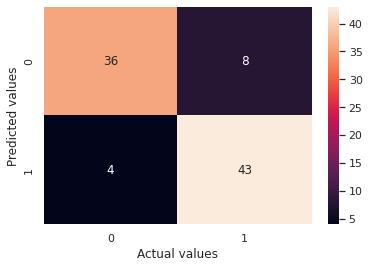

In [ ]:
sns.heatmap(cm1,annot = True)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.8681318681318682

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))


              precision    recall  f1-score   support

           0       0.90      0.82      0.86        44
           1       0.84      0.91      0.88        47

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [ ]:
#Precision is the fraction of heart diseases that were predicted to be heart diseases and were actually heart diseases.
#Recall measures the fraction of true cases of Heart Disease that were detected. 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# Predicting the Test set results
model2 = classifier.fit(X_train,y_train)
prediction2 = model2.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(y_test, prediction2)
cm2


array([[23, 21],
       [17, 30]])

In [ ]:
#accuracy score
ac2 = accuracy_score(y_test, prediction2)
ac2

0.5824175824175825

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(y_test,prediction2)
cm2



array([[23, 21],
       [17, 30]])

Text(30.5, 0.5, 'Predicted values')

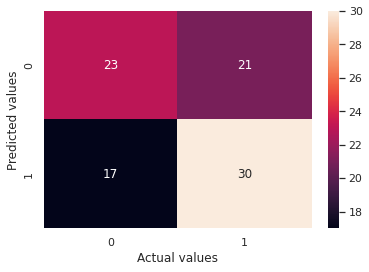

In [ ]:
sns.heatmap(cm2,annot = True)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction2))


              precision    recall  f1-score   support

           0       0.57      0.52      0.55        44
           1       0.59      0.64      0.61        47

    accuracy                           0.58        91
   macro avg       0.58      0.58      0.58        91
weighted avg       0.58      0.58      0.58        91



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
rf = RandomForestClassifier()
model3 = rf.fit(X_train,y_train)

# Predicting the Test set results
prediction3 = model3.predict(X_test)
rf.score(X_train,y_train)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm3 = confusion_matrix(y_test, prediction3)
cm3

array([[34, 10],
       [ 7, 40]])

In [ ]:
#accuracy score for random classifier
ac3 = accuracy_score(y_test, prediction3)
ac3

0.8131868131868132

Text(30.5, 0.5, 'Predicted values')

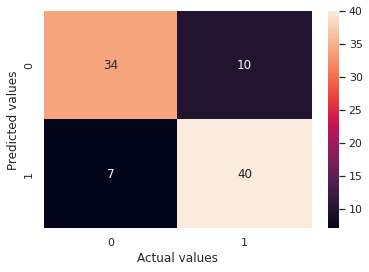

In [ ]:
sns.heatmap(cm3,annot = True)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction3))


              precision    recall  f1-score   support

           0       0.83      0.77      0.80        44
           1       0.80      0.85      0.82        47

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [ ]:
#decision tree algorithm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

decTree = DecisionTreeClassifier(max_depth=6, random_state=0)
model4 = decTree.fit(X_train,y_train)
prediction4 = model4.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm4 = confusion_matrix(y_test, prediction4)
cm4


array([[32, 12],
       [ 6, 41]])

In [ ]:
#accuracy score for random classifier
ac4 = accuracy_score(y_test, prediction4)
ac4

0.8021978021978022

Text(30.5, 0.5, 'Predicted values')

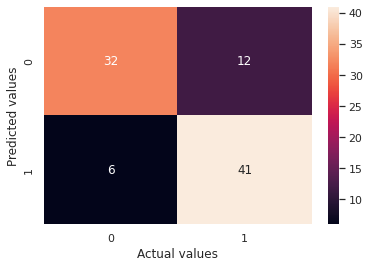

In [ ]:
sns.heatmap(cm4,annot = True)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        44
           1       0.77      0.87      0.82        47

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



In [ ]:
#Models and their accuracy
print("*****************Models and their accuracy*****************")
print("Logistic Regression Classifier :: ", metrics.accuracy_score(y_test,prediction1))
print("K Neighbours Classifier :: ", metrics.accuracy_score(y_test,prediction2))
print("Random Forest Classifier :: ", metrics.accuracy_score(y_test, prediction3))
print("Decision Tree :: ", metrics.accuracy_score(y_test,prediction4))

*****************Models and their accuracy*****************
Logistic Regression Classifier ::  0.8681318681318682
K Neighbours Classifier ::  0.5824175824175825
Random Forest Classifier ::  0.8131868131868132
Decision Tree ::  0.8021978021978022


In [ ]:
model_scores = {'Logistic Regression Classifier': metrics.accuracy_score(y_test,prediction1),"K Neighbours Classifier" : metrics.accuracy_score(y_test,prediction2), "Random Forest Classifier ":  metrics.accuracy_score(y_test, prediction3),"Decision Tree" : metrics.accuracy_score(y_test,prediction4)}

In [ ]:
#model comparision
model_compare = pd.DataFrame(model_scores, index=['accuracy_score'])
model_compare

,Logistic Regression Classifier,K Neighbours Classifier,Random Forest Classifier,Decision Tree
accuracy_score,0.868132,0.582418,0.813187,0.802198


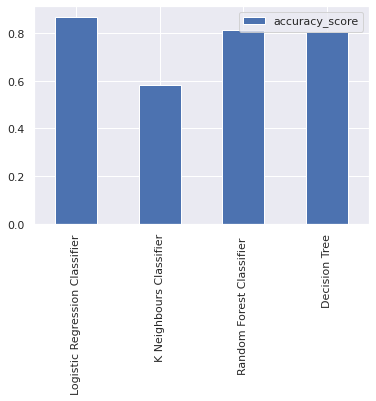

In [ ]:
model_compare.T.plot(kind = 'bar') 

In all the above four Logistic regression gives the best accuracy score


Building a predictive system


In [ ]:
import numpy as np
input_data = (43,1,0,120,177,0,0,120,1,2.5,1,0,3)
# converting as numpy array
input_data_as_numpy = np.asarray(input_data)

#reshaping data
input_data_reshaped = input_data_as_numpy.reshape(1,-1)
prediction1 = model1.predict(input_data_reshaped)
print(prediction1)

if (prediction1[0]==0):
  print('. ------     The person does not have a heart disease.  -----       ')
else:
  print('-------   The person has heart disease.  ------  ')

[0]
. ------     The person does not have a heart disease.  -----       


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'heartattack.sav'
pickle.dump(classifier,open(filename,'wb'))


In [ ]:
#loading the saved model
loaded_model = pickle.load(open('heartattack.sav','rb'))